371024 Introducción al Aprendizaje Máquina  
Tarea K vecinos más cercanos (clasificación binaria).   
`Lic. Jose Ricardo Mendoza Villar`

# 1. Escoger una base de datos de kaggle con al menos 5 columnas para
comparar un modelo de k vecinos más cercanos y un modelo de
árboles de decisión, incluir el link a la base de datos.
- Base de Datos: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# 2. Escoger una de las columnas de la base de datos como variable objetivo (preferentemente la variable objetivo debe tomar únicamente dos valores).

In [4]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [5]:
y.value_counts() # Clases no balanceadas

Outcome
0    500
1    268
Name: count, dtype: int64

# 3. Separar la base de datos en una de entrenamiento y otra de prueba.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify = y,
    random_state=20250511
)

# 4. Las columnas restantes serán utilizadas como variables descriptivas. Escoger al menos tres pares de variables descriptivas y para cada par realizar lo siguiente:
a. Mostrar un diagrama de dispersión en el plano (definido por el par de variables descriptivas) resaltando con colores o figuras la etiqueta de la variable objetivo.  
b. Entrenar un modelo de k vecinos más cercanos utilizando únicamente las dos variables descriptivas.  
c. Obtener la exactitud (accuracy) del modelo.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

##################################################
-----Características descriptivas: Glucose vs BloodPressure ----


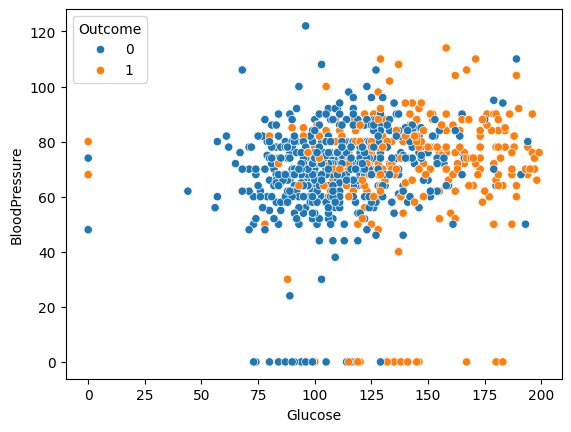

Accuracy Train: 0.7523277467411545
Accuracy Test: 0.7142857142857143
##################################################
-----Características descriptivas: BMI vs SkinThickness ----


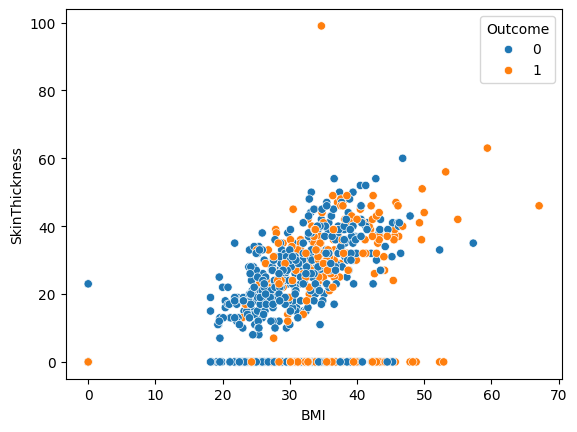

Accuracy Train: 0.7132216014897579
Accuracy Test: 0.6406926406926406
##################################################
-----Características descriptivas: DiabetesPedigreeFunction vs Pregnancies ----


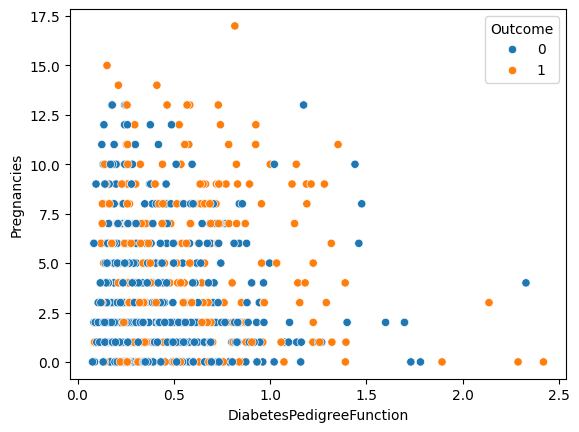

Accuracy Train: 0.6890130353817505
Accuracy Test: 0.6666666666666666


In [14]:
for x, z in [
    ("Glucose", "BloodPressure"),
    ("BMI", "SkinThickness"),
    ("DiabetesPedigreeFunction", "Pregnancies")
]:
    print("#"*50)
    print(f"-----Características descriptivas: {x} vs {z} ----")

    # A. Mostrar un diagrama de dispersión en el plano.
    sns.scatterplot(data = df, x = x, y = z, hue = 'Outcome')
    plt.show()

    # B. Modelo K vecinos más cercanos
    knn = KNeighborsClassifier(n_neighbors = 12)
    knn.fit(X_train[[x, z]], y_train)

    #C. Obtener exactitud del modelo
    print(f"Accuracy Train: {knn.score(X_train[[x, z]], y_train)}")
    print(f"Accuracy Test: {knn.score(X_test[[x, z]], y_test)}")

# 5. Entrenar un modelo de k vecinos más cercanos utilizando todas las variables descriptivas.

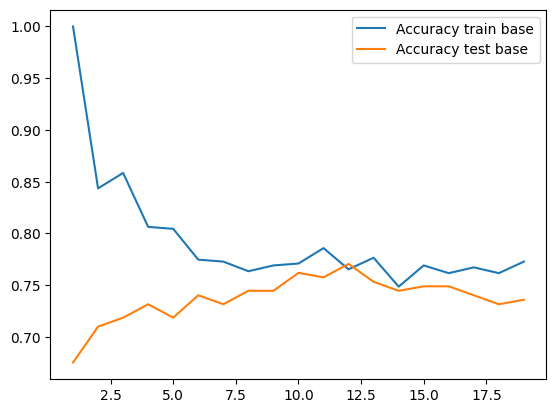

In [10]:
score_train = {}
score_test = {}
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    score_train[k] = knn.score(X_train, y_train)
    score_test[k]= knn.score(X_test, y_test)
plt.plot(score_train.keys(), score_train.values(), label = 'Accuracy train base')
plt.plot(score_test.keys(), score_test.values(), label = 'Accuracy test base')
plt.legend()
plt.show()

In [11]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

# 6. Obtener la exactitud (accuracy) del modelo y compararla con las métricas de los modelos del punto 4c. ¿Qué puede decir de esta comparación?

In [12]:
print(f"Accuracy Train: {score_train[12]}")
print(f"Accuracy Test: {score_test[12]}")

Accuracy Train: 0.7653631284916201
Accuracy Test: 0.7705627705627706


En general para el modelo con todas las variables, se hizo una búsqueda grid para encontrar el mejor hiperparámetro *n_neighbors = 12* que maximizara la combinación accurary train + test , sin embargo, este mismo hiperparámetro para el resto de modelos no precisamente maximiza la métrica de accuracy, ya que cada modelo dependiendo de las variables puede esperar un hiperparámetro distinto, adicional, en las gráficas de los pares de variables descriptivas se ve una alta superposición de valores pertenecientes a diferentes clases, por lo que al solo haber tomado dos variables era esperado que la combinación diera un conjunto de métricas inferior a la del modelo con todas las variables que puede generalizar mejor, finalmente, se presenta un conjunto de clases desbalanceadas, por lo qué el modelo de knn puede tener ciertas dificultades al tratar con este tipo de problemas, quizá alguna alternativa de selección pueda mejorar el rendimiento.